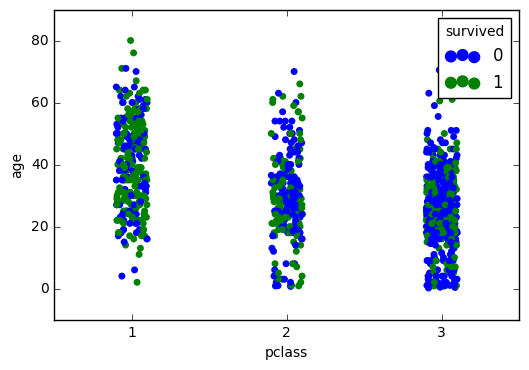

In [150]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import ensemble
from sklearn import datasets
from sklearn import tree
import graphviz
#sns.set(style="ticks")
df=pd.read_excel('/home/indixuser/Downloads/titanic3.xlsx')
df['boat']=df[['boat']].fillna(999)
sns.stripplot(x="pclass", y="age",hue="survived", data=df, jitter=True);


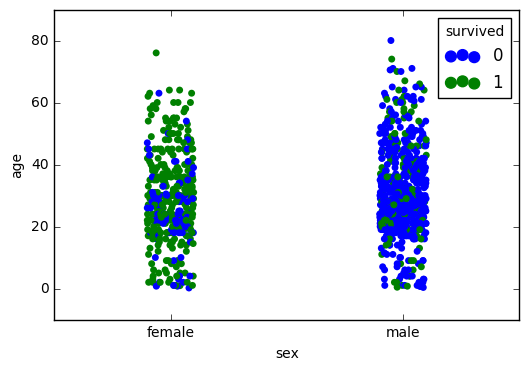

In [151]:
sns.stripplot(x="sex", y="age",hue="survived", data=df, jitter=True);

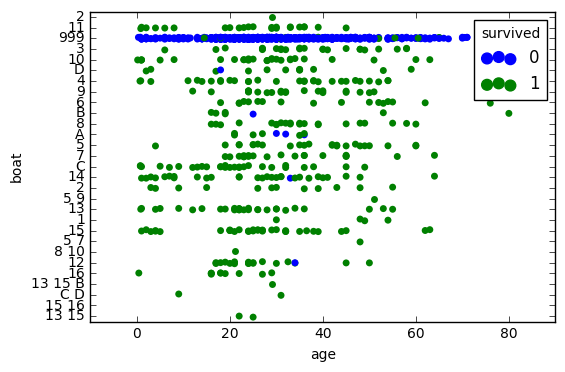

In [152]:
sns.stripplot(x="age", y="boat",hue="survived", data=df, jitter=True);

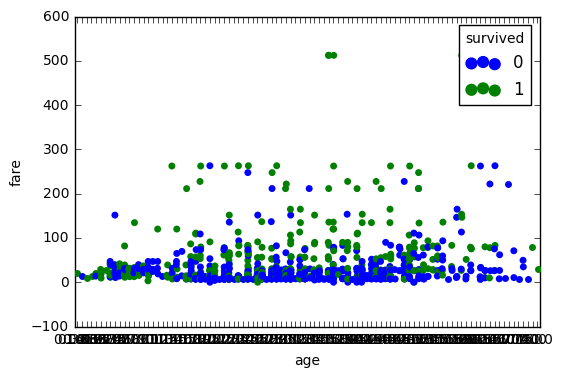

In [153]:
sns.stripplot(x="age", y="fare",hue="survived", data=df, jitter=True);

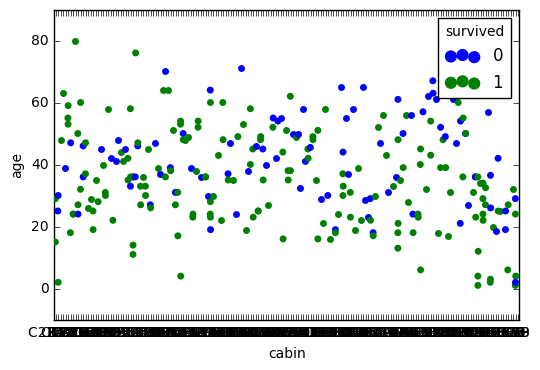

In [154]:
sns.stripplot(x="cabin", y="age",hue="survived", data=df, jitter=True);

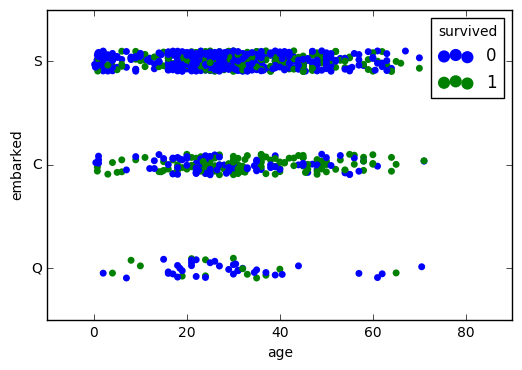

In [155]:
sns.stripplot(x="age", y="embarked",hue="survived", data=df, jitter=True);

In [174]:
from sklearn.datasets import load_iris
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

dot_data = tree.export_graphviz(clf)
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

In [169]:


agemean=int(np.mean(df[df['name'].str.contains(r'Master') & df['age'].notnull()]['age']))
adultagemean=int(np.mean(df[df['name'].str.contains(r'Mr\.') & df['age'].notnull()]['age']))
missagemean=int(np.mean(df[df['name'].str.contains(r'Miss\.') & (df['parch'] <3 ) & (df['parch'] >0 )  & df['age'].notnull()]['age']))
print (adultagemean)
print (agemean)
print (missagemean)





df.loc[df.name.str.match(r'.*Miss.*') & (df['parch'] <3 ) & (df['parch'] >0 ) & df.age.isnull(),'age']=int(missagemean)
df.loc[df.name.str.match(r'.*Master.*') & df.age.isnull(),'age']=int(agemean)
df.loc[df.name.str.match(r'.*Mr\..*') & df.age.isnull(),'age']=int(adultagemean)

df = df.fillna(0)
df['pname'] = pd.factorize(df.name)[0]
df['sex_id'] = pd.factorize(df.sex)[0]

df['boat_id'] = pd.factorize(df.boat)[0]



train=df[['name','pclass','pname','sex_id','age','boat_id','survived']]
train=train.loc[0:500,:]



test=df[['name','pclass','pname','sex_id','age','boat_id','survived']]
test=test.loc[501:,:]

print (test.head())

clf = tree.DecisionTreeClassifier()
clf = clf.fit(train.iloc[:,2:6],train.iloc[:,6])

dot_data = tree.export_graphviz(clf) 
graph = graphviz.Source(dot_data) 
graph.render("titanic") 



32
5
12
                                          name  pclass  pname  sex_id   age  \
501          Mellinger, Miss. Madeleine Violet       2    501       0  13.0   
502  Mellinger, Mrs. (Elizabeth Anne Maidment)       2    502       0  41.0   
503                  Mellors, Mr. William John       2    503       1  19.0   
504                          Meyer, Mr. August       2    504       1  39.0   
505               Milling, Mr. Jacob Christian       2    505       1  48.0   

     boat_id  survived  
501       15         1  
502       15         1  
503        9         1  
504        2         0  
505        2         0  


'iris.pdf'

In [ ]:

model = ensemble.GradientBoostingClassifier(learning_rate=0.005, n_estimators=400,
                                max_depth=2)



model = model.fit(train.iloc[:,2:6],train.iloc[:,6])


output = model.predict(test.iloc[:,2:6])

print (output)
print (accuracy_score(output,test.iloc[:,6])*100)
writer = pd.ExcelWriter('/home/indixuser/Downloads/finoutput.xlsx')
test.to_excel(writer,'Sheet1')
writer.save()